In [1]:
cd ~/work/home/feser/work/ocaml-workspace/staged-synth/runs/

/home/jovyan/work/mnt/scratch/metric-synth-runs


In [41]:
from shared import load_joblog
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [r"\documentclass[acmsmall,review,timestamp]{acmart}"]
        ),
    }
)

In [10]:
import os
def load_sketch(logs):
    dfs = []
    for log in logs.split(","):
        name = os.path.basename(log)
        dfs.append(load_joblog(log, name))
    return pd.concat(dfs)


In [25]:
joblog_df = load_joblog('csg-abs-and-enum')
joblog_df = joblog_df[
    (joblog_df["method"] == "abstract_norepl")
    | (joblog_df["method"] == "abstract")
    | (joblog_df["method"] == "enumerate")
]

metric_joblog_df = load_joblog('csg-metric')
sketch_joblog_df1 = load_joblog('csg-sketch-1', name='sketch_joblog')
sketch_joblog_df2 = load_joblog('csg-sketch-2')
sketch_joblog_df = pd.concat([sketch_joblog_df1, sketch_joblog_df2])

joblog_df = pd.concat([
    sketch_joblog_df1, 
    sketch_joblog_df2,
    metric_joblog_df,
    joblog_df
])


joblog_df

,Seq,Host,Starttime,JobRuntime,Send,Receive,Exitval,Signal,Command,method,status,bench,bench_kind,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time
0,15,:,1.649911e+09,1.846,0,0,1,0,/work/staged-synth/_build/default//bin/pixels....,sketch_par,failure,timeout,Hand-written,NaN,NaN,NaN,NaN,NaN,NaN
1,13,:,1.649911e+09,1.882,0,0,1,0,/work/staged-synth/_build/default//bin/pixels....,sketch_par,failure,timeout,Hand-written,NaN,NaN,NaN,NaN,NaN,NaN
2,1,:,1.649911e+09,2.073,0,0,1,0,/work/staged-synth/_build/default//bin/pixels....,sketch_par,failure,timeout,Hand-written,NaN,NaN,NaN,NaN,NaN,NaN
3,19,:,1.649911e+09,2.379,0,0,1,0,/work/staged-synth/_build/default//bin/pixels....,sketch_par,failure,timeout,Hand-written,NaN,NaN,NaN,NaN,NaN,NaN
4,5,:,1.649911e+09,2.562,0,0,1,0,/work/staged-synth/_build/default//bin/pixels....,sketch_par,failure,timeout,Hand-written,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,11,:,1.649989e+09,3747.000,0,0,137,0,ulimit -v 4000000; ulimit -t 3600; /work/stage...,abstract,time,letter_o,Hand-written,NaN,NaN,NaN,NaN,NaN,NaN
207,73,:,1.649989e+09,3735.000,0,0,137,0,ulimit -v 4000000; ulimit -t 3600; /work/stage...,abstract,time,bench_9,Generated,NaN,NaN,NaN,NaN,NaN,NaN
209,67,:,1.649989e+09,3745.000,0,0,137,0,ulimit -v 4000000; ulimit -t 3600; /work/stage...,abstract,time,bench_12,Generated,NaN,NaN,NaN,NaN,NaN,NaN
215,75,:,1.649989e+09,3748.000,0,0,137,0,ulimit -v 4000000; ulimit -t 3600; /work/stage...,abstract,time,bench_13,Generated,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
n_bench = 40

<Figure size 432x288 with 0 Axes>

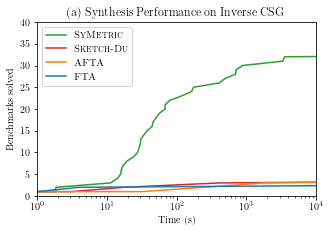

In [82]:
def plot(df):
    plt.tight_layout()
    fig = plt.figure(figsize=(5, 3.2))
    ax = fig.add_subplot(1, 1, 1)
    
    df = df[df['status'] == 'success']
    df = df.groupby(['method', 'bench'])['JobRuntime'].median()
    std = df.xs('metric')
    std = std.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(std) + [1e10], range(0, len(std) + 2), label=r"\textsc{SyMetric}", color="C2"
    )
    
    sketch = df.xs('sketch')
    sketch = sketch.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(sketch) + [1e10], range(0, len(sketch) + 2), label=r"\textsc{Sketch-Du}", color="C3"
    )
    
    absn = df.xs('abstract_norepl')
    absn = absn.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(absn) + [1e10], range(0, len(absn) + 2), label=r"\textsc{AFTA}", color="C1"
    )
    
    enum = df.xs('enumerate')
    enum = enum.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(enum) + [1e10], range(0, len(enum) + 2), label=r"\textsc{FTA}", color="C0"
    )

    """
    en = enum["runtime"]
    en = en.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(en),
        range(0, len(en) + 1),
        label=r"\textsc{Enumeration}",
        color="C0",
    )

    abstr = abst["runtime"]
    abstr = abstr.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(abstr),
        range(0, len(abstr) + 1),
        label=r"\textsc{Syngar}",
        color="C1",
    )
    """

    ax.set_ylim([0, n_bench])
    ax.set_xlim([1e0, 1e4])
    ax.set_xscale('log')
    ax.set_ylabel("Benchmarks solved")
    ax.set_xlabel("Time (s)")
    plt.legend(loc="upper left")
    ax.set_title(r"(a) Synthesis Performance on Inverse CSG")
    plt.savefig('/home/jovyan/work/home/feser/metric_synth/csg_comparison.pdf')
plot(joblog_df)